Did not converge. Try increasing max_iterations or adjusting learning_rate.
0.1 [ 0.8736061  -0.55251074] 0.29907275382945003 0.3159321720459774


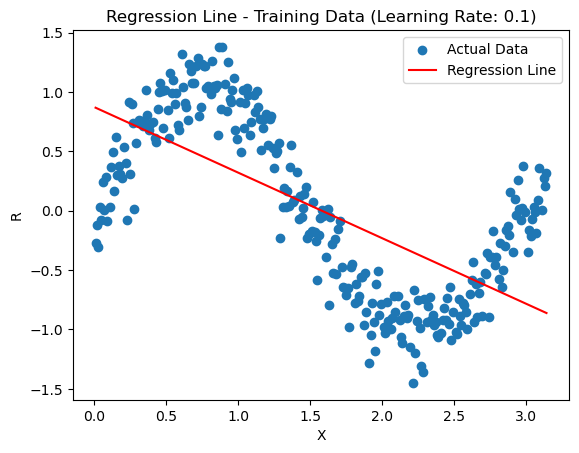

Did not converge. Try increasing max_iterations or adjusting learning_rate.
0.01 [ 0.8736061  -0.55251074] 0.29907275382945003 0.3159321720459767


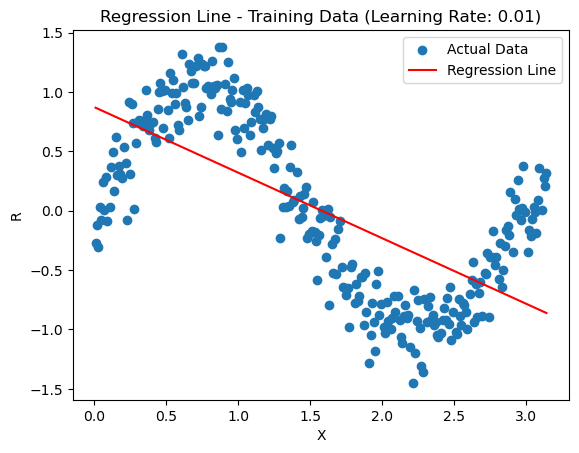

Did not converge. Try increasing max_iterations or adjusting learning_rate.
0.001 [ 0.87340767 -0.55240993] 0.2990727638052127 0.31592286640785683


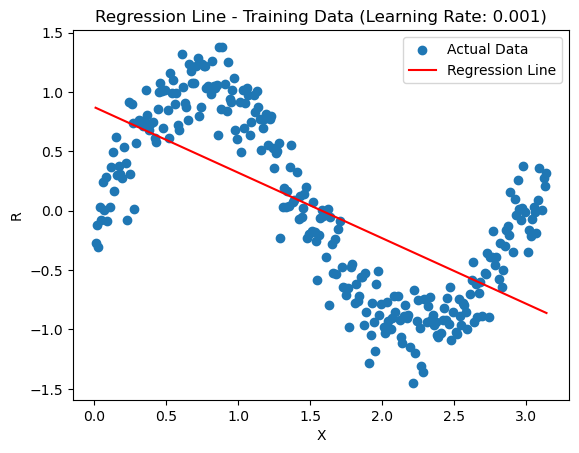

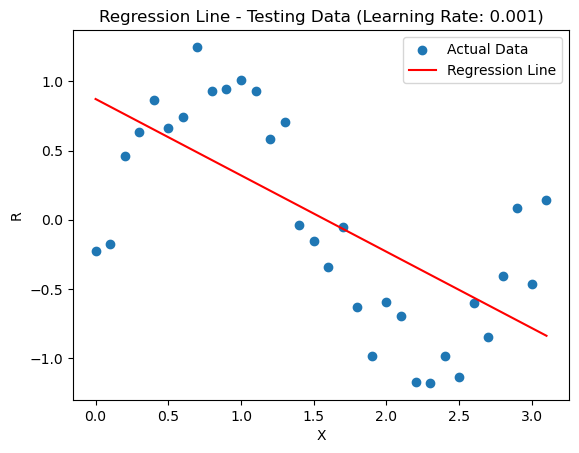

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform linear regression using gradient descent
def gradient_descent(X_train, R_train, learning_rate, tolerance=1e-6, max_iterations=20000):
    # Initialize weights randomly
    num_features = X_train.shape[1]
    weights = np.random.rand(num_features)
    
    iteration = 0
    mse = float('inf')
    
    # While loop until convergence or max_iterations reached
    while mse > tolerance and iteration < max_iterations:
        # Calculate predictions
        predictions = np.dot(X_train, weights)
        
        # Calculate Mean Squared Error (MSE)
        mse = np.mean((predictions - R_train)**2)
        
        # Calculate gradients
        gradients = 2*np.dot(X_train.T, (predictions - R_train)) / len(R_train)
        
        # Update weights simultaneously
        weights = weights - learning_rate * gradients
        
        iteration += 1
    
    if mse < tolerance:
        print(f"Converged after {iteration} iterations.")
    else:
        print("Did not converge. Try increasing max_iterations or adjusting learning_rate.")
    
    return weights, mse

# Function to make predictions on test data
def predict(X_test, weights):
    return np.dot(X_test, weights)

# Function to calculate Mean Squared Error (MSE) on test data
def calculate_mse(predictions, R_test):
    return np.mean((predictions - R_test)**2)

# Function to plot the regression line
def plot_regression_line(X, R, weights, title):
    plt.scatter(X[:, 1], R, label='Actual Data')
    plt.plot(X[:, 1], np.dot(X, weights), color='red', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('R')
    plt.title(title)
    plt.legend()
    plt.show()

# Replace 'your_training_data.csv' and 'your_testing_data.csv' with your actual file paths
def load_data(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    # Assuming the last column is the output (R) and the rest are features (X)
    X = data[:, :-1]
    R = data[:, -1]
    return X, R

# Replace 'your_training_data.csv' and 'your_testing_data.csv' with your actual file paths
path='C:\\Users\\maham\\Downloads\\'
train_file_path = path+'trainRegression.csv'
test_file_path = path+'testRegression.csv'

# Load training data
X_train, R_train = load_data(train_file_path)

# Load testing data
X_test, R_test = load_data(test_file_path)

# Add a column of ones to X_train and X_test for the bias term (theta0)
X_train = np.column_stack((np.ones(len(X_train)), X_train))
X_test = np.column_stack((np.ones(len(X_test)), X_test))

# Set learning rates
learning_rates = [0.1, 0.01, 0.001]

# Train the model for each learning rate
for learning_rate in learning_rates:
    # Perform gradient descent
    weights, mse_train = gradient_descent(X_train, R_train, learning_rate)
    
    # Make predictions on test data
    predictions = predict(X_test, weights)
    
    # Calculate MSE on test data
    mse_test = calculate_mse(predictions, R_test)
    
    # Print results
    print(learning_rate, weights, mse_train, mse_test)
    
    # Plot regression line for training data
    plot_regression_line(X_train, R_train, weights, f'Regression Line - Training Data (Learning Rate: {learning_rate})')
    # Plot regression line for testing data
plot_regression_line(X_test, R_test, weights, f'Regression Line - Testing Data (Learning Rate: {learning_rate})')

